# Josh Cubero
# Assignment 5
# DS-630

Task 1
1.	Run a multilayer perceptron (feed forward neural network) with two hidden layers and rectified linear nonlinearities on the iris dataset using the keras Sequential interface (https://keras.io/getting-started/sequential-model-guide/).
2.	Include code for selecting regularization strength and number of hidden units using GridSearchCV and evaluation on an independent test-set.

Task 2
3.	Train a multilayer perceptron on the MNIST dataset using the traditional train/test split as given by mnist.load_data in keras.
4.	Use a separate 10000 samples (from the training set) for model selection and to compute learning curves (accuracy vs epochs, not vs n_samples).
5.	Compare a “vanilla” model with a model using drop-out. Visualize learning curves for all models.
6.	As an estimate, you should expect each model to take less than 30 minutes to train on a CPU.

Task 3
7.	Train a convolutional neural network on the SVHN dataset (http://ufldl.stanford.edu/housenumbers/) in format 2 (single digit classification).
8.	You should achieve at least 85% test-set accuracy with a base model. Also build a model using batch normalization.
9.	 Your final accuracy will be included in the grading.
10.	You can compare against other approaches reported here (http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#5356484e) if you’re curious.
11.	You shouldn’t use the “extra” data. On a CPU, each epoch (pass through the training set) can take up to ~40 minutes.
Hint : Make sure you are doing the reshape for the training set correctly. A direct reshape might give you garbled images. Display an image after reshaping to make sure they are correct.

Task 4
12.	Load the weights of a pre-trained convolutional neural network included in keras, see https://keras.io/applications/ , and use it as feature extraction method to train a linear model or MLP (scikit-learn or keras are fine) on the pets dataset (http://www.robots.ox.ac.uk/~vgg/data/pets/). You should achieve at least 70% accuracy. It’s recommended you store the extracted features on disk so you don’t have to recompute them for model selection. You will be working with the 37 class classification task.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from keras.datasets import mnist
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Task 1**

In [ ]:
model = MLPClassifier(activation='relu', random_state=42,verbose=False)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64)],
    'alpha': [0.0001, 0.001, 0.01]
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,verbose=False)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64)]},
             verbose=False)

### The GridSearchCV above return a best parameters object that will be used in the final MLP model for this task.

In [ ]:
print("Best params: ", grid_search.best_params_)

Best params:  {'alpha': 0.0001, 'hidden_layer_sizes': (16, 16)}


#### The final MLP model returned an accuracy score of ~97% on the unseen test set.

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))

Accuracy on test set: 96.67%


# **Task 2**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

#### The block of code below normalizes the data in a simple fashion, this eliminates the need for standard scaler.

In [ ]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [ ]:
vanilla_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50, random_state=42, verbose=True)

In [ ]:
vanilla_model.fit(X_train, y_train)

Iteration 1, loss = 0.47431632
Iteration 2, loss = 0.22927734
Iteration 3, loss = 0.17696342
Iteration 4, loss = 0.14435153
Iteration 5, loss = 0.12004767
Iteration 6, loss = 0.10380706
Iteration 7, loss = 0.08920397
Iteration 8, loss = 0.07720051
Iteration 9, loss = 0.06835007
Iteration 10, loss = 0.06074760
Iteration 11, loss = 0.05408582
Iteration 12, loss = 0.04892448
Iteration 13, loss = 0.04287431
Iteration 14, loss = 0.03763085
Iteration 15, loss = 0.03378562
Iteration 16, loss = 0.03072277
Iteration 17, loss = 0.02743888
Iteration 18, loss = 0.02434519
Iteration 19, loss = 0.02195433
Iteration 20, loss = 0.01965099
Iteration 21, loss = 0.01701190
Iteration 22, loss = 0.01586672
Iteration 23, loss = 0.01405152
Iteration 24, loss = 0.01263917
Iteration 25, loss = 0.01113030
Iteration 26, loss = 0.01000402
Iteration 27, loss = 0.00894482
Iteration 28, loss = 0.00760788
Iteration 29, loss = 0.00725695
Iteration 30, loss = 0.00637412
Iteration 31, loss = 0.00579204
Iteration 32, los

MLPClassifier(max_iter=50, random_state=42, verbose=True)

In [ ]:
train_accuracy_vanilla = accuracy_score(y_train, vanilla_model.predict(X_train))
val_accuracy_vanilla = accuracy_score(y_val, vanilla_model.predict(X_val))
print("Vanilla MLP - Training accuracy: {:.2f}% | Validation accuracy: {:.2f}%".format(train_accuracy_vanilla * 100, val_accuracy_vanilla * 100))

Vanilla MLP - Training accuracy: 100.00% | Validation accuracy: 97.83%


#### The vanilla MLP model returned a validation accuracy of ~98%.

In [ ]:
dropout_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50, random_state=42, verbose=False, solver='adam', alpha=1e-5, learning_rate_init=0.001, batch_size=64)
dropout_model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, batch_size=64, max_iter=50, random_state=42)

#### The visual below depicts the learning curves for the vanilla model and the dropout model. As we can see, the vanilla model's learning curve is smoother than that of the dropout model.

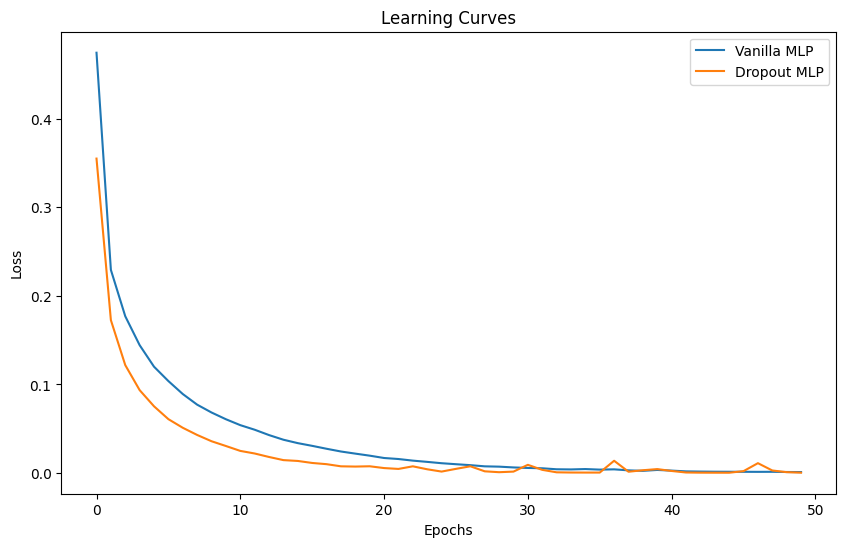

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(vanilla_model.loss_curve_, label='Vanilla MLP')
plt.plot(dropout_model.loss_curve_, label='Dropout MLP')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Task 3

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers, models
from scipy.io import loadmat

#### Here, I load the training and test set, then rearranged the dimensions of the image arrays to match the model's input shape requirements. Additionally, I adjusted the labels to ensure uniformity via replacing all occurrences of the number 10 with the number 0.

In [ ]:
train_data = loadmat('/content/train_32x32.mat')
test_data = loadmat('/content/test_32x32.mat')

X_train = np.transpose(train_data['X'], (3, 0, 1, 2))
y_train = train_data['y']
y_train[y_train == 10] = 0

X_test = np.transpose(test_data['X'], (3, 0, 1, 2))
y_test = test_data['y']
y_test[y_test == 10] = 0

In [ ]:
X_train = np.transpose(train_data['X'], (3, 0, 1, 2))
y_train = train_data['y']
y_train[y_train == 10] = 0
X_test = np.transpose(test_data['X'], (3, 0, 1, 2))
y_test = test_data['y']
y_test[y_test == 10] = 0

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

Here, I build the model for the CNN. I've included 3 layers of the 2d convolutional layer, and 2 layers of pooling. I fininsh the NN with a flatten command, which is the required shape for the dense layers. The first dense layer uses Rectified Linear Unit for the activation function, and the final dense layer uses softmax.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history =  model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
1031/1031 [==============================] - 4s 4ms/step - loss: 0.2108 - accuracy: 0.9364 - val_loss: 0.3283 - val_accuracy: 0.9094
Epoch 2/10
1031/1031 [==============================] - 4s 4ms/step - loss: 0.2008 - accuracy: 0.9398 - val_loss: 0.3331 - val_accuracy: 0.9114
Epoch 3/10
1031/1031 [==============================] - 4s 4ms/step - loss: 0.1854 - accuracy: 0.9449 - val_loss: 0.3576 - val_accuracy: 0.9061
Epoch 4/10
1031/1031 [==============================] - 4s 4ms/step - loss: 0.1771 - accuracy: 0.9463 - val_loss: 0.3461 - val_accuracy: 0.9132
Epoch 5/10
1031/1031 [==============================] - 4s 4ms/step - loss: 0.1656 - accuracy: 0.9505 - val_loss: 0.3593 - val_accuracy: 0.9064
Epoch 6/10
1031/1031 [==============================] - 4s 4ms/step - loss: 0.1554 - accuracy: 0.9530 - val_loss: 0.3454 - val_accuracy: 0.9117
Epoch 7/10
1031/1031 [==============================] - 4s 4ms/step - loss: 0.1479 - accuracy: 0.9552 - val_loss: 0.3747 - val_accuracy:

#### The model returns a train accuracy of 96% and validation accuracy of 90%. This indicates that there could be some overfitting occurring, which is supported by the delta between the training loss and validation loss. To fix this, I would need to further hypertune, however, I'm paying for GPU compute on Google Colab, so I don't want to execute more model's than necessary.

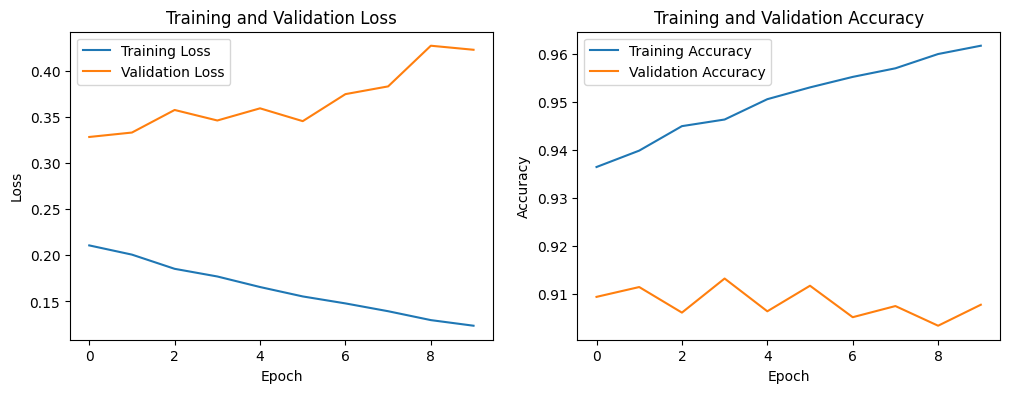

814/814 [==============================] - 2s 2ms/step - loss: 0.5011 - accuracy: 0.8968
Test accuracy: 0.8967809081077576


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

#### The visuals above depicted the accuracy curve and loss curve a materially separated and indicate overfitting is pressent in the model.

#### In this next model, I implement the same model, but add BatchNormalization, which improves performance by normalizing the activation at each layer in the model. This reduces the impacts of covariance and helps regularize the data so we don't need to use dropout or any other regularization technique.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
1031/1031 [==============================] - 7s 5ms/step - loss: 0.6184 - accuracy: 0.8101 - val_loss: 0.4781 - val_accuracy: 0.8571
Epoch 2/10
1031/1031 [==============================] - 5s 5ms/step - loss: 0.3454 - accuracy: 0.8965 - val_loss: 0.3727 - val_accuracy: 0.8905
Epoch 3/10
1031/1031 [==============================] - 5s 5ms/step - loss: 0.2816 - accuracy: 0.9157 - val_loss: 0.3681 - val_accuracy: 0.8915
Epoch 4/10
1031/1031 [==============================] - 5s 5ms/step - loss: 0.2384 - accuracy: 0.9275 - val_loss: 0.3612 - val_accuracy: 0.8950
Epoch 5/10
1031/1031 [==============================] - 5s 5ms/step - loss: 0.2032 - accuracy: 0.9380 - val_loss: 0.3507 - val_accuracy: 0.8991
Epoch 6/10
1031/1031 [==============================] - 5s 5ms/step - loss: 0.1732 - accuracy: 0.9473 - val_loss: 0.3888 - val_accuracy: 0.8935
Epoch 7/10
1031/1031 [==============================] - 5s 5ms/step - loss: 0.1503 - accuracy: 0.9544 - val_loss: 0.3584 - val_accuracy:

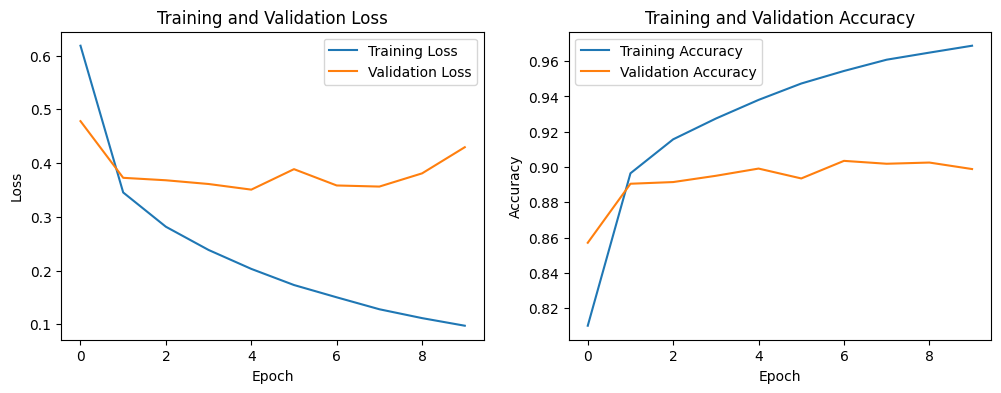

814/814 [==============================] - 2s 2ms/step - loss: 0.4833 - accuracy: 0.8850
Test accuracy: 0.8850260972976685


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

#### While the overall accuracy of this model is less than the vanilla version, the batch normalization model actually does perform better. If we used early stopping, we'd only use 1 epoch where we see training and validation curves converge. At this point the loss and accuracy is the closest, which is where we have no overfitting, and thus a model that will generalize well to new, unseen data.

# **Task 4**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

#### For Task 4, I chose to load the data from tensorflow_datasets, as this would use the least amount of storage.

In [ ]:
import tensorflow_datasets as tfds
from IPython.display import clear_output
import matplotlib.pyplot as plt
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True, as_supervised=True)
print(info)
train_dataset = dataset['train']
test_dataset = dataset['test']


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteW51FA4/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteW51FA4/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir=PosixGPath('/tmp/tmp4g_eqwoztfds'),
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel

#### In this block of code I resize the data and cast it into a tensor. This is necessary in order to transform the each image into a matrix of 1's and 0's.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import preprocess_input

def preprocess_data(image, label):
    image = tf.image.resize(image, (224, 224))

    image = preprocess_input(image)

    label = tf.cast(label, tf.int32)
    label = tf.one_hot(label, depth=37)

    return image, label

train_dataset = train_dataset.map(preprocess_data)
test_dataset = test_dataset.map(preprocess_data)

train_dataset = train_dataset.shuffle(1000).batch(32)
test_dataset = test_dataset.batch(32)


In [ ]:
train_images = []
train_labels = []
for image, label in train_dataset:
    train_images.append(image)
    train_labels.append(label)

In [ ]:
test_images = []
test_labels = []
for image, label in test_dataset:
    test_images.append(image)
    test_labels.append(label)

In [ ]:
train_images = tf.concat(train_images, axis=0)
train_labels = tf.concat(train_labels, axis=0)
test_images = tf.concat(test_images, axis=0)
test_labels = tf.concat(test_labels, axis=0)

In [ ]:
print(test_images.shape)
print(train_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(3669, 224, 224, 3)
(3680, 224, 224, 3)
(3680, 37)
(3669, 37)


#### Above I check the shape of the data as I'll need to use the shape as a parameter when I extract features from the ResNet.

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=base_model.output)

#### This is a custom function built to extract the features. I had to use batches because there's so much data that it caused a resource error in the GPU. Additionally, the function calls the feature extractor that i created using the ResNet50 instance.

In [ ]:
def extract_features(images, batch_size=32):
    num_images = len(images)
    all_features = []

    for start in range(0, num_images, batch_size):
        end = start + batch_size
        batch_images = images[start:end]
        images_resized = tf.image.resize(batch_images, (224, 224))
        images_preprocessed = preprocess_input(images_resized.numpy())
        features = feature_extractor.predict(images_preprocessed)
        all_features.append(features)

    return np.concatenate(all_features, axis=0)

In [ ]:
train_features = extract_features(train_images)

1/1 [==============================] - 0s 31ms/step


In [ ]:
test_images.shape

TensorShape([3669, 224, 224, 3])

In [ ]:
test_features = extract_features(test_images)

1/1 [==============================] - 2s 2s/step


In [ ]:
train_features = train_features.reshape(train_features.shape[0], -1)

In [ ]:
test_features = test_features.reshape(test_features.shape[0], -1)

#### Here, I create a shallow NN with just a three layers, opting to start simple, then increase layers if necessary.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

mlp_model = Sequential([
    Dense(256, activation='relu', input_dim=train_features.shape[1]),
    Dense(128, activation='relu'),
    Dense(37, activation='softmax')
])

#### In the block below, I chose to create my own optimizer instance so I can test different learning rates. Surprisingly, the default lr of 0.001 performed the best. Any other lr returned val_accuracy near 2%.

In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
mlp_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = mlp_model.fit(
    train_features, train_labels,
    epochs=20,
    batch_size=32,
    validation_data=(test_features, test_labels)
)

Epoch 1/20
115/115 [==============================] - 1s 6ms/step - loss: 1.6233 - accuracy: 0.5443 - val_loss: 1.1050 - val_accuracy: 0.6607
Epoch 2/20
115/115 [==============================] - 0s 4ms/step - loss: 0.5651 - accuracy: 0.8174 - val_loss: 0.8555 - val_accuracy: 0.7174
Epoch 3/20
115/115 [==============================] - 0s 4ms/step - loss: 0.3401 - accuracy: 0.8878 - val_loss: 0.9200 - val_accuracy: 0.7212
Epoch 4/20
115/115 [==============================] - 0s 4ms/step - loss: 0.1985 - accuracy: 0.9454 - val_loss: 0.9681 - val_accuracy: 0.7228
Epoch 5/20
115/115 [==============================] - 0s 4ms/step - loss: 0.1416 - accuracy: 0.9592 - val_loss: 0.9553 - val_accuracy: 0.7375
Epoch 6/20
115/115 [==============================] - 0s 4ms/step - loss: 0.0681 - accuracy: 0.9837 - val_loss: 0.9254 - val_accuracy: 0.7503
Epoch 7/20
115/115 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9976 - val_loss: 0.8595 - val_accuracy: 0.7719
Epoch 

#### The val accuracy at 77% and training accuracy indicates that overfitting is present in this model.

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

Model Accuracy: 0.7732352018356323


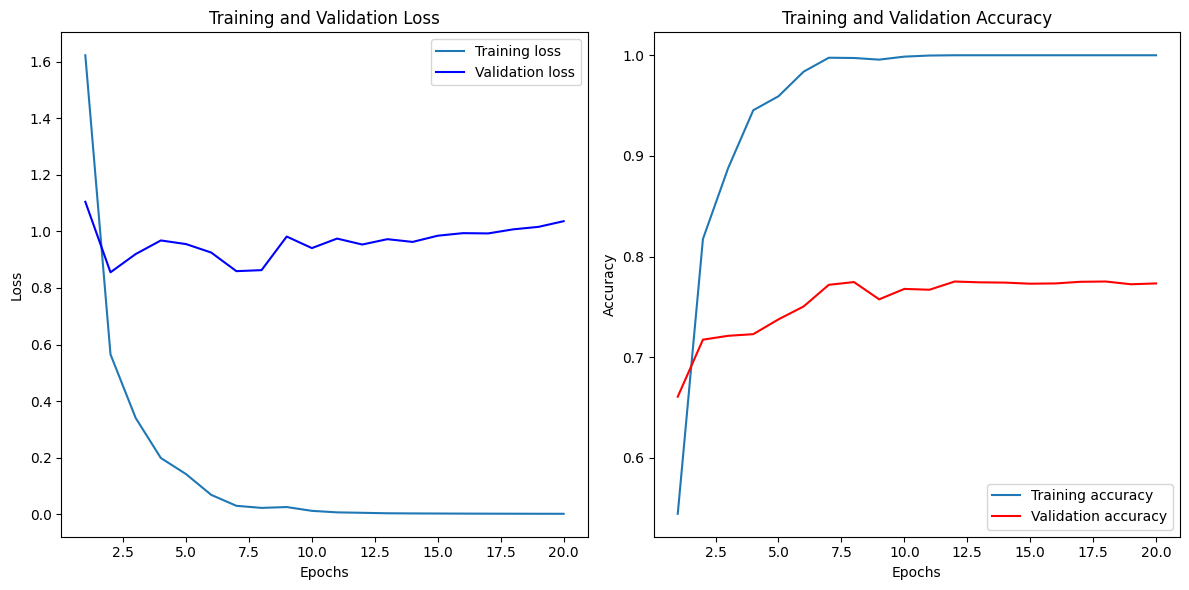

In [ ]:
print(f'Model Accuracy: {val_accuracy[-1]}')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()